In [2]:
import pandas as pd
import numpy as np
import sys, os

from matplotlib import pyplot as plt
sys.path.insert(1, os.path.join(sys.path[0], '../'))  # for importing local packages from src

%reload_ext autoreload
%autoreload 2 

In [3]:
from src.model.rc_dataset import ExperimentDataset


DATASET_NEMA_H0 = 'datasets/dataset_NEMA_NEMA_H0.csv'
DATASET_NEMA_H3 = 'datasets/dataset_NEMA_NEMA_H3.csv'
DATASET_NEMA_H15 = 'datasets/dataset_NEMA_NEMA_H15.csv'

dataset_nema_h0 = ExperimentDataset(csv_path=DATASET_NEMA_H0)
dataset_nema_h3 = ExperimentDataset(csv_path=DATASET_NEMA_H3)
dataset_nema_h15 = ExperimentDataset(csv_path=DATASET_NEMA_H15)

datasets= [dataset_nema_h0,dataset_nema_h3, dataset_nema_h15] 

In [4]:
from pipeline_cnwheat import SingleReservoirGenerator, TargetGenerator
from model_config_cnwheat import measurable_reservoirs, state_variables

In [15]:
for state_var in measurable_reservoirs:
  res_gen = SingleReservoirGenerator(state_var=state_var)
  X = res_gen.transform(datasets=datasets)
  print(f'{state_var:>16}: shape {X.shape}')

       state__An: shape (1, 2424, 10)
       state__Ts: shape (1, 2424, 10)
       state__Tr: shape (1, 2424, 10)
       state__Rd: shape (1, 2424, 10)
       state__gs: shape (1, 2424, 10)


In [11]:
sun_gen = TargetGenerator(target='input_PARi')
y = sun_gen.transform(datasets=datasets).reshape(-1)

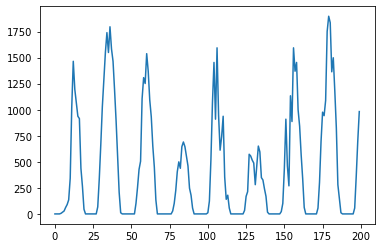

In [14]:
plt.plot(y[:200])
plt.show()